In [226]:
import pandas as pd 
import numpy as np
import matplotlib
#import nltk 
#nltk.download()

# Importation et Concaténation 

In [227]:
dfS = pd.read_csv('data/labeled_samples/sample_Sylvere.csv', delimiter=',', header=None)
dfF = pd.read_csv('data/labeled_samples/sample_Francois.csv', delimiter=',', header=None)
dfV = pd.read_csv('data/labeled_samples/sample_Vitali2.csv', delimiter=',', header=None)
dfW = pd.read_csv('data/labeled_samples/sample_Wesley_labeled.csv', delimiter=',', header=None)
dfC = pd.read_csv('data/labeled_samples/sample_Cedric_labeled.csv', delimiter=',', header=None)
dfFa = pd.read_csv('data/labeled_samples/sample_Fatima.csv', delimiter=',', header=None)

In [228]:
#Concatene tous nos csv dans un seul dataframe
df = pd.concat([dfS, dfF, dfC, dfV, dfFa, dfW], ignore_index=True, axis=0)

In [229]:
df.rename(columns={0: 'id', 1 : 'label', 2 : 'review'}, inplace = True)
df.head()

,id,label,review
0,54,Acceuil / Politesse,Cet espace a perdu de son intérêt. On y trouva...
1,685,Relation commercial,Impossible d'avoir un conseiller par téléphone...
2,1665,Acceuil / Politesse,Accueil excellent temps d'attente cours
3,1437,Acceuil / Politesse,Très bon accueil
4,1587,Acceuil / Politesse,Parsonnel aimable et efficace


In [230]:
#ajout de nouveaux commentaires
new_sample = pd.read_csv('data/labeled_samples/aditional_sample_labeled.csv', encoding = 'UTF-8')

In [231]:
new_sample = new_sample[['Unnamed: 0', 'label','caption']]
new_sample.rename(columns={'Unnamed: 0': 'id', 'caption' : 'review'}, inplace = True)

In [232]:
df = pd.concat([df,new_sample], ignore_index=True)

# Data cleaning

In [233]:
#supprimer les ligne avec les NAs
print('Avant:', len(df))
df.dropna(inplace = True)
print('Après:', len(df))

Avant: 896
Après: 804


In [234]:
#Normalisation des labels
di  = {'temps d''attente' : "temps d'attente",
       "temps d' attente" : "temps d'attente",
       "temps d'attente n" : "temps d'attente",
       "temps d'attente N" : "temps d'attente",
       " temps attente" : "temps d'attente",
       "'temps d''attente'" : "temps d'attente",
       "temps d’attente" : "temps d'attente",
       "temps d'attente " : "temps d'attente",
       "temps-attente" : "temps d'attente",
       "temps d'attentes" : "temps d'attente",
       "Temps d'attente" : "temps d'attente",
       "Temps-Attente" : "temps d'attente",
       "Temps d'attente " : "temps d'attente",
       "relation commerciale" : "relation commercial",
       "relation-commerciale" : "relation commercial",
       " relation commerciale" : "relation commercial",
       "relation commerciale " : "relation commercial",
       "emotion" : "émotion",
       "emotion ": "émotion",
       "Emotion / Ressenti" : "émotion",
       "Emotion" : "émotion",
       " Emotion/Ressenti" : "émotion", 
       "emotion/ressenti" : "émotion",                         
       "emotion / ressenti" : "émotion",
       "emotion-ressenti" : "émotion",
       "temps d''attente" : "temps d'attente",
       "accueil" : "accueil / politesse",
       "Acceuil" : "accueil / politesse",
       "accueil" : "accueil / politesse",
       "acceuil / politesse" : "accueil / politesse",
       "accueil-politesse" : "accueil / politesse",
       "accueil/politesse" : "accueil / politesse",
       " accueil/politesse" : "accueil / politesse",
       "accueil" : "accueil / politesse",
       "problème-technique" : "problème technique",
       "probleme technique" : "problème technique",
       "Problème-Technique" : "problème technique",
       " problème technique  " : "problème technique",
       "Problème technique" : "problème technique",
       "Probleme Technique" : "problème technique",
       "Problème Technique" : "problème technique",
       "acceuil" : "accueil / politesse",
       "accueil" : "accueil / politesse",
       "accueil " : "accueil / politesse",
       "Accueil" : "accueil / politesse",
       "Accueil-politesse" : "accueil / politesse",
       "Acceuil / Politesse" : "accueil / politesse",
       "Accueil / Politesse" : "accueil / politesse",
       "motion" : "émotion",
       "Emotion" : "émotion",
       "Emotion ": "émotion",
       "Emotion-Ressenti" : "émotion",
       "cadre/atmosphère" : "cadre / atmosphère",
       "cadre-atmosphère" : "cadre / atmosphère",
       "cadre" : "cadre / atmosphère",
       "Cadre-Atmosphère" : "cadre / atmosphère",
       "cadre / atmosphere" : "cadre / atmosphère",
       "cadre / atmosphere " : "cadre / atmosphère",
       "relation commerciale" : "relation commercial",
       "Relation commercial" : "relation commercial",
       "changement d’opérateur / départ boutique" : "changement d'opérateur",
       "'changement d''opérateur'" : "changement d'opérateur",
       "changement-opérateur" : "changement d'opérateur",
       "Changement d'opérateur" : "changement d'opérateur",
       "Changement-Opérateur" : "changement d'opérateur",
       " accueil politesse" : "accueil / politesse",
       " emotion/ressenti" : "émotion",
       "conseil" : "relation commercial",
       "Mauvais service client" : "relation commercial",
       "Relation-Commerciale" : "relation commercial",
       "Relation commerciale" : "relation commercial",
       "Relation Commercial" : "relation commercial",
       "cadre / atmosphere" : "cadre / atmosphère",
       "Cadre / Atmosphère": "cadre / atmosphère",
       "Cadre / Atmosphere" : "cadre / atmosphère",
       "Cadre / Atmosphere " : "cadre / atmosphère",
       "Cadre" : "cadre / atmosphère"}

In [235]:
df.replace({"label": di}, inplace=True)

In [236]:
#calculer la taille des classes
df['label'].value_counts()

accueil / politesse       264
relation commercial       158
émotion                   129
temps d'attente           114
cadre / atmosphère         70
problème technique         62
changement d'opérateur      7
Name: label, dtype: int64

In [237]:
#suppresion de la catégorie "changement d'opérateur"
df = df[df.label != "changement d'opérateur"]

In [238]:
# tous les carateres en miniscule et le contenu des colonnes en string 
df = pd.concat([df[col].astype(str).str.lower() for col in df.columns], axis=1)

## Création de TRAIN set

In [239]:
train_data = df.groupby('label').apply(lambda x: x.sample(n=60))

In [240]:
train_data.to_csv('data/train.csv', index=False, encoding = 'UTF-8')

# Tokenisation et Visualisation 

In [200]:
import nltk
from nltk.corpus import stopwords
#stopwords.words('french')

In [58]:
from string import punctuation
import re

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

from nltk import word_tokenize, pos_tag

## Tokenisation

In [219]:
df.head()

,id,label,review
0,54,accueil / politesse,cet espace a perdu de son intérêt. on y trouva...
1,685,relation commercial,impossible d'avoir un conseiller par téléphone...
2,1665,accueil / politesse,accueil excellent temps d'attente cours
3,1437,accueil / politesse,très bon accueil
4,1587,accueil / politesse,parsonnel aimable et efficace


In [220]:
# les commentaires sont mis dans df_comment
df_comment = df['review']

In [221]:
type(df_comment)

pandas.core.series.Series

In [63]:
#place les commentaires dans une varb en str
commentstr = ''.join(df_comment)

In [64]:
print(type(commentstr))

<class 'str'>


In [65]:
#les commentaires stocker dans un string pour pouvoir les passer dans le tokenizer
commentstr

'cet espace a perdu de son intérêt. on y trouvait un service compétent et agréable maintenant il ne reste plus que le compétent.  pour combien de temps encore ... avec les économies d\'orange ?impossible d\'avoir un conseiller par téléphone (un comble!!!), leur numéro est introuvable où que ce soit!?! je mettrais 0 étoile si c\'était possible!accueil excellent temps d\'attente courstrès bon accueilparsonnel aimable et efficacedidier a l\'accueil est très désagréable, il n\'a pas du tout envie d\'être là et il est agacé par chaque client. le reste de l\'équipe est très dynamique dommage le premier accueil est le plus important.le personnel n\'est vraiment pas orienté client ! franchement je déconseille cette boutique !!!personnel plus préoccupé par le papotage entre amie que par le client.  orange veut faire la banque ....il devrait commencer par choisir son personnel. après 15 minutes d\'attente  , la personne n a pas vu qu\'elle avait un client..mais sa copine part en vacance demain..

In [66]:
#commentstr3 = tknzr.tokenize(commentstr)

In [67]:
# On met la methode RegexTokennizer dans la varb tokenizer
tokenizer = nltk.RegexpTokenizer(r'\w+')


In [68]:
# On transforme commentstr en token
commentstr4 = tokenizer.tokenize(commentstr)

In [69]:
print(len(commentstr4))

16670


In [70]:
type(commentstr4)

list

### Visulisation des données

In [71]:
# Stocke dans freq la frequence d'apparition des mots dans nos tokens

freq = nltk.FreqDist(commentstr4)

In [72]:
freq

FreqDist({'de': 506, 'et': 412, 'à': 282, 'un': 254, 'le': 253, 'la': 240, 'je': 234, 'd': 223, 'pas': 217, 'que': 216, ...})

In [73]:
len(freq)

3308

In [74]:
#places les mots(tokens) les plus  frequents dans 'freq_mostcom' un dict{}
freq_mostcom = freq.most_common(25)

In [75]:
freq_mostcom

[('de', 506),
 ('et', 412),
 ('à', 282),
 ('un', 254),
 ('le', 253),
 ('la', 240),
 ('je', 234),
 ('d', 223),
 ('pas', 217),
 ('que', 216),
 ('pour', 190),
 ('a', 187),
 ('l', 187),
 ('en', 181),
 ('est', 171),
 ('vous', 149),
 ('très', 148),
 ('une', 142),
 ('les', 134),
 ('ne', 130),
 ('boutique', 129),
 ('orange', 127),
 ('service', 124),
 ('il', 119),
 ('j', 113)]

In [76]:
#place les comment les plus frequents dans un dataframe pour faire un graph

df_freq = pd.DataFrame.from_dict(freq_mostcom)

In [77]:
df_freq.columns = ['mots', 'total']

df_freq

,mots,total
0,de,506
1,et,412
2,à,282
3,un,254
4,le,253
5,la,240
6,je,234
7,d,223
8,pas,217
9,que,216


In [78]:
df_freq.plot.bar(x='mots',y='total')


[Text(0, 0, 'de'),
 Text(0, 0, 'et'),
 Text(0, 0, 'à'),
 Text(0, 0, 'un'),
 Text(0, 0, 'le'),
 Text(0, 0, 'la'),
 Text(0, 0, 'je'),
 Text(0, 0, 'd'),
 Text(0, 0, 'pas'),
 Text(0, 0, 'que'),
 Text(0, 0, 'pour'),
 Text(0, 0, 'a'),
 Text(0, 0, 'l'),
 Text(0, 0, 'en'),
 Text(0, 0, 'est'),
 Text(0, 0, 'vous'),
 Text(0, 0, 'très'),
 Text(0, 0, 'une'),
 Text(0, 0, 'les'),
 Text(0, 0, 'ne'),
 Text(0, 0, 'boutique'),
 Text(0, 0, 'orange'),
 Text(0, 0, 'service'),
 Text(0, 0, 'il'),
 Text(0, 0, 'j')]

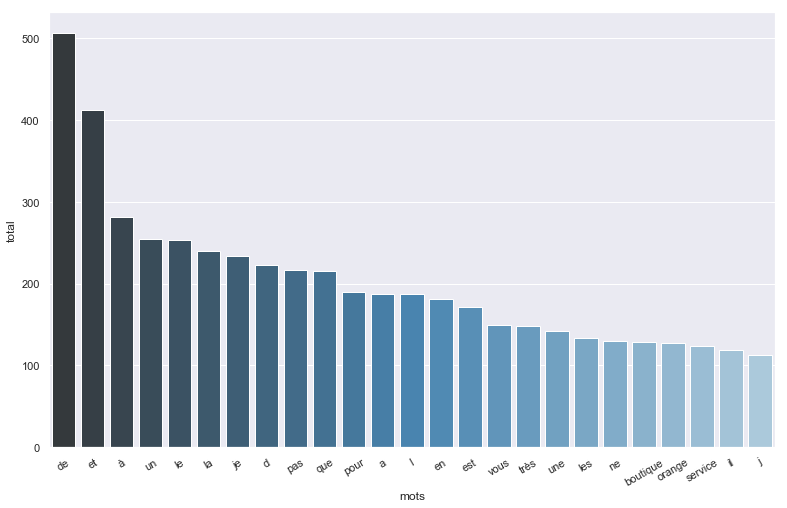

In [79]:
import seaborn as sns


sns.set(rc={'figure.figsize':(13,8)})

graph = sns.barplot(x="mots", y="total", data=df_freq, palette="Blues_d", orient="v" )
graph.set_xticklabels(graph.get_xticklabels(), rotation=30)

# Analyse des données et stopwords

In [80]:
no_stopwords = set(('ne', 'pas','n'))

punctuation = set(punctuation) - set(('?', '!'))


In [81]:
stoplist = set(nltk.corpus.stopwords.words('french')) - no_stopwords

len(stoplist)

154

### Suppression des mots les plus fréquents

In [82]:
#les 18 mots les plus frequents
freq_mostcom18 = freq.most_common(18)

In [83]:
#rajoute les 18 mots les plus frequents a la stoplist
stoplist.update(freq_mostcom18)

len(stoplist)

172

In [84]:
comment5 = []

In [85]:
#Stock dans comment5, tous les mots non présent dans la stoplist et punctuation
comment5 += [w for w in commentstr4 if not w in list(stoplist) and (w not in punctuation)]

In [86]:
comment5

['cet',
 'espace',
 'a',
 'perdu',
 'intérêt',
 'trouvait',
 'service',
 'compétent',
 'agréable',
 'maintenant',
 'ne',
 'reste',
 'plus',
 'compétent',
 'combien',
 'temps',
 'encore',
 'économies',
 'orange',
 'impossible',
 'avoir',
 'conseiller',
 'téléphone',
 'comble',
 'numéro',
 'introuvable',
 'où',
 'mettrais',
 '0',
 'étoile',
 'si',
 'possible',
 'accueil',
 'excellent',
 'temps',
 'attente',
 'courstrès',
 'bon',
 'accueilparsonnel',
 'aimable',
 'efficacedidier',
 'a',
 'accueil',
 'très',
 'désagréable',
 'n',
 'a',
 'pas',
 'tout',
 'envie',
 'être',
 'là',
 'agacé',
 'chaque',
 'client',
 'reste',
 'équipe',
 'très',
 'dynamique',
 'dommage',
 'premier',
 'accueil',
 'plus',
 'important',
 'personnel',
 'n',
 'vraiment',
 'pas',
 'orienté',
 'client',
 'franchement',
 'déconseille',
 'cette',
 'boutique',
 'personnel',
 'plus',
 'préoccupé',
 'papotage',
 'entre',
 'amie',
 'client',
 'orange',
 'veut',
 'faire',
 'banque',
 'devrait',
 'commencer',
 'choisir',
 'pers

In [87]:
len(comment5)

10287

### Mots les moins fréquents

In [88]:
#Les moins frequents

freq_less = dict(freq.most_common()[-100:])

In [89]:
freq_less

{'attenteéquipe': 1,
 'effectifsrapide': 1,
 'efficacecontact': 1,
 'plaisant': 1,
 'personnelsuper': 1,
 'prole': 1,
 'clientexcellente': 1,
 'clientconseillère': 1,
 'économiser': 1,
 'argent': 1,
 'conseillant': 1,
 'abonnent': 1,
 'épouse': 1,
 'titre': 1,
 'séjour': 1,
 'horriblement': 1,
 'parlant': 1,
 'anglaisaccueil': 1,
 'prévenant': 1,
 'semainepas': 1,
 'progrand': 1,
 'confort': 1,
 'sièges': 1,
 'réception': 1,
 'insuffisant': 1,
 'clientslongue': 1,
 'bravoje': 1,
 'désoléetrès': 1,
 'sympaaccueil': 1,
 'pourrià': 1,
 'maximum': 1,
 'etctopissime': 1,
 'accueilaccueil': 1,
 'déplorablebon': 1,
 'comparativement': 1,
 'rennesa': 1,
 'durée': 1,
 'annoncéeaccueil': 1,
 'désagréableaccueil': 1,
 'écoutecomme': 1,
 'habitude': 1,
 'excès': 1,
 'vendrele': 1,
 'fixé': 1,
 'lugar': 1,
 'incrível': 1,
 'muito': 1,
 'bem': 1,
 'situadonuuuuuuuul': 1,
 'aurez': 1,
 'mêmes': 1,
 'contrairedes': 1,
 'intéressantesbonjour': 1,
 'professionnelaccueil': 1,
 'catastrophique': 1,
 'mond

### Mots par nombres d'apparitions

In [90]:
#Place les valeurs du dict avec les frequences d'apparition des mots dans nb1()
nb1 = freq.values()

nb1

dict_values([8, 2, 187, 5, 506, 15, 1, 98, 54, 1, 254, 124, 13, 412, 22, 7, 119, 130, 6, 89, 216, 253, 190, 2, 28, 11, 66, 134, 1, 223, 127, 6, 33, 16, 105, 39, 2, 17, 7, 171, 2, 10, 69, 12, 234, 1, 5, 6, 39, 73, 46, 6, 98, 17, 75, 1, 53, 1, 26, 1, 187, 148, 16, 112, 217, 103, 44, 6, 31, 15, 1, 5, 69, 13, 6, 10, 3, 1, 78, 16, 2, 4, 4, 71, 129, 2, 1, 10, 1, 3, 32, 240, 2, 4, 1, 1, 27, 6, 19, 32, 13, 72, 21, 18, 72, 9, 1, 5, 181, 1, 2, 2, 29, 1, 11, 40, 3, 5, 106, 9, 60, 10, 113, 88, 39, 1, 83, 8, 1, 282, 87, 1, 1, 1, 81, 4, 1, 2, 1, 1, 1, 1, 3, 17, 23, 1, 2, 16, 2, 2, 1, 1, 21, 2, 105, 27, 7, 1, 2, 10, 3, 149, 10, 2, 2, 142, 27, 5, 5, 38, 7, 1, 21, 5, 11, 6, 5, 1, 1, 3, 3, 1, 21, 8, 3, 8, 8, 3, 7, 16, 4, 9, 10, 3, 44, 1, 3, 84, 35, 1, 1, 1, 8, 17, 4, 1, 9, 1, 22, 2, 2, 2, 2, 1, 1, 8, 3, 6, 18, 1, 1, 6, 42, 9, 42, 3, 5, 2, 3, 54, 5, 1, 5, 6, 16, 3, 1, 6, 37, 1, 31, 3, 70, 1, 1, 1, 1, 78, 1, 1, 2, 1, 1, 34, 18, 4, 35, 4, 1, 1, 5, 5, 2, 1, 9, 75, 6, 3, 10, 1, 3, 10, 10, 23, 1, 1, 19, 49, 5

In [91]:
from collections import Counter


In [92]:
#Counter va compter la frequence d'apparition des mots par nombre(nb1 = valeurs du dict Freq) 
nb_apparition_mots = Counter(nb1)


In [93]:
#frequence d'apparition des mots par nombre, classer du plus petit au plus grand
#ex: il y a 1945 mots qui apparaissent 1 fois 

nb_apparition_mots.most_common()
    

[(1, 2007),
 (2, 481),
 (3, 211),
 (4, 115),
 (5, 90),
 (6, 62),
 (8, 47),
 (7, 39),
 (9, 26),
 (10, 23),
 (12, 17),
 (13, 11),
 (11, 11),
 (17, 10),
 (16, 9),
 (21, 8),
 (18, 8),
 (14, 8),
 (35, 7),
 (15, 6),
 (19, 6),
 (28, 5),
 (20, 5),
 (27, 4),
 (23, 4),
 (22, 3),
 (39, 3),
 (32, 3),
 (29, 3),
 (187, 2),
 (98, 2),
 (54, 2),
 (105, 2),
 (69, 2),
 (75, 2),
 (26, 2),
 (44, 2),
 (31, 2),
 (78, 2),
 (72, 2),
 (40, 2),
 (42, 2),
 (37, 2),
 (34, 2),
 (25, 2),
 (506, 1),
 (254, 1),
 (124, 1),
 (412, 1),
 (119, 1),
 (130, 1),
 (89, 1),
 (216, 1),
 (253, 1),
 (190, 1),
 (66, 1),
 (134, 1),
 (223, 1),
 (127, 1),
 (33, 1),
 (171, 1),
 (234, 1),
 (73, 1),
 (46, 1),
 (53, 1),
 (148, 1),
 (112, 1),
 (217, 1),
 (103, 1),
 (71, 1),
 (129, 1),
 (240, 1),
 (181, 1),
 (106, 1),
 (60, 1),
 (113, 1),
 (88, 1),
 (83, 1),
 (282, 1),
 (87, 1),
 (81, 1),
 (149, 1),
 (142, 1),
 (38, 1),
 (84, 1),
 (70, 1),
 (49, 1),
 (45, 1),
 (47, 1)]

### Mots par ordre alphabétique

In [94]:
#Les mots du dataset ranger par ordre alphabetiques
mots_alphabetique = sorted(freq)

In [95]:
type(mots_alphabetique), len(mots_alphabetique)

(list, 3308)

In [96]:
mots_alphabetique

['0',
 '00',
 '02',
 '04',
 '06',
 '1',
 '10',
 '100',
 '1000',
 '10gb',
 '110euros',
 '11h',
 '11h30',
 '12',
 '120',
 '128',
 '12h45',
 '14',
 '14h00bien',
 '15',
 '15euros',
 '15min',
 '15minutes',
 '15mn',
 '17',
 '18',
 '18h',
 '19',
 '19h',
 '19h30',
 '19h34',
 '1an',
 '1h',
 '1h30',
 '1ère',
 '2',
 '20',
 '200',
 '2005',
 '2016',
 '2017',
 '2018',
 '2019',
 '20gb',
 '20h00',
 '20분',
 '20유로는',
 '21eme',
 '22',
 '24',
 '2400',
 '25',
 '250',
 '256',
 '26h',
 '2gb',
 '2h',
 '2h45',
 '2nouveaux',
 '2ème',
 '3',
 '30',
 '30bon',
 '30degres',
 '30mn',
 '34',
 '35',
 '35min',
 '3900',
 '390ppersonnel',
 '3j',
 '3ème',
 '4',
 '40',
 '40유로',
 '45',
 '4g',
 '5',
 '50',
 '50è',
 '5km',
 '5mn',
 '6',
 '600',
 '64go',
 '7',
 '72',
 '76',
 '7très',
 '8',
 '82',
 '9',
 '900',
 '900ms',
 '92très',
 '99',
 'a',
 'a5',
 'abandoner',
 'ability',
 'abonnement',
 'abonnements',
 'abonnementvaut',
 'abonnent',
 'abonner',
 'abord',
 'about',
 'aboutir',
 'absence',
 'absente',
 'absolument',
 'absten

#### Suppression de nombres

In [97]:
#les 93 premiers(a supprimer), qui sont des nombres ou des heures
nb_a_supp = mots_alphabetique[:93]

In [98]:
#rajoute les nb a la stoplist
stoplist.update(nb_a_supp)

len(stoplist)

265

In [99]:
stoplist

{('a', 187),
 ('d', 223),
 ('de', 506),
 ('en', 181),
 ('est', 171),
 ('et', 412),
 ('je', 234),
 ('l', 187),
 ('la', 240),
 ('le', 253),
 ('pas', 217),
 ('pour', 190),
 ('que', 216),
 ('très', 148),
 ('un', 254),
 ('une', 142),
 ('vous', 149),
 ('à', 282),
 '0',
 '00',
 '02',
 '04',
 '06',
 '1',
 '10',
 '100',
 '1000',
 '10gb',
 '110euros',
 '11h',
 '11h30',
 '12',
 '120',
 '128',
 '12h45',
 '14',
 '14h00bien',
 '15',
 '15euros',
 '15min',
 '15minutes',
 '15mn',
 '17',
 '18',
 '18h',
 '19',
 '19h',
 '19h30',
 '19h34',
 '1an',
 '1h',
 '1h30',
 '1ère',
 '2',
 '20',
 '200',
 '2005',
 '2016',
 '2017',
 '2018',
 '2019',
 '20gb',
 '20h00',
 '20분',
 '20유로는',
 '21eme',
 '22',
 '24',
 '2400',
 '25',
 '250',
 '256',
 '26h',
 '2gb',
 '2h',
 '2h45',
 '2nouveaux',
 '2ème',
 '3',
 '30',
 '30bon',
 '30degres',
 '30mn',
 '34',
 '35',
 '35min',
 '3900',
 '390ppersonnel',
 '3j',
 '3ème',
 '4',
 '40',
 '40유로',
 '45',
 '4g',
 '5',
 '50',
 '50è',
 '5km',
 '5mn',
 '6',
 '600',
 '64go',
 '7',
 '72',
 '76',


In [100]:
comment7 = []

In [101]:
comment7 = [w for w in commentstr4 if not w in list(stoplist) and (w not in punctuation)]

len(comment7)

10028

In [102]:
len(freq)

3308

In [103]:
len(commentstr4)

16670

#### suppression de mots récurrents

In [104]:
freq2 = nltk.FreqDist(comment7)



In [105]:
len(freq2)

3118

In [106]:
freq2.most_common() 

[('pas', 217),
 ('a', 187),
 ('très', 148),
 ('ne', 130),
 ('boutique', 129),
 ('orange', 127),
 ('service', 124),
 ('n', 112),
 ('accueil', 98),
 ('plus', 89),
 ('personnel', 78),
 ('bien', 78),
 ('attente', 75),
 ('cette', 71),
 ('client', 69),
 ('bon', 53),
 ('vendeur', 49),
 ('peu', 45),
 ('tout', 44),
 ('fait', 42),
 ('clients', 42),
 ('chez', 40),
 ('téléphone', 39),
 ('si', 39),
 ('car', 38),
 ('sans', 37),
 ('magasin', 35),
 ('sim', 35),
 ('traduit', 35),
 ('google', 35),
 ('the', 35),
 ('rien', 34),
 ('original', 34),
 ('avoir', 33),
 ('faire', 32),
 ('personne', 32),
 ('vendeurs', 32),
 ('être', 31),
 ('quand', 29),
 ('and', 29),
 ('temps', 28),
 ('agence', 28),
 ('to', 28),
 ('problème', 28),
 ('après', 27),
 ('dit', 27),
 ('fois', 27),
 ('trop', 27),
 ('aimable', 26),
 ('écoute', 26),
 ('internet', 25),
 ('i', 25),
 ('aller', 23),
 ('comme', 23),
 ('alors', 23),
 ('beaucoup', 23),
 ('agréable', 22),
 ('reçu', 22),
 ('in', 22),
 ('donc', 21),
 ('commercial', 21),
 ('carte', 

In [107]:
mots_a_sup = ("tant pouvais pouvoir faire bonjour comme etc lorsque dit cet veut veux rue alpagué dû première côté quel certain doit opã oui mn haut pris faut u deux cette tout si car ã my problã of allez leurs puis entre bonour voir aussi quoi cela autres e the lã in for alors prendre ça dire aller après donc i to être and rã tã trã fois traduit dã fait chez cette ã mère tabac poste mis go  are went some sold  us when up do french venez agrã quâ ds annã occupã allã mãªme là nâ number your apple who weeks about quickly quant effet passée min rj11 esim demain pompom durant viendrais sent habite trois hors ainsi all dés train vont chère via troisième just think their better first could but new now our what selling even allée mains imprimante justificatif rendue vie midi r coise film ue faisant mise bã mã numã ãªtes sale wanted will from after talk offer ration pb ok jeudi moths ve tienen hay this one opéra prenez jusqu'")

In [108]:
type(mots_a_sup)

str

In [109]:
mots_a_sup2 = mots_a_sup.strip(',').split()

len(mots_a_sup2)

175

In [110]:
stoplist.update(mots_a_sup2)

len(stoplist)

438

In [111]:
comment7 = [w for w in commentstr4 if not w in list(stoplist) and (w not in punctuation)]

len(comment7), type(comment7)

(8717, list)

In [112]:
comment7

['espace',
 'a',
 'perdu',
 'intérêt',
 'trouvait',
 'service',
 'compétent',
 'agréable',
 'maintenant',
 'ne',
 'reste',
 'plus',
 'compétent',
 'combien',
 'temps',
 'encore',
 'économies',
 'orange',
 'impossible',
 'avoir',
 'conseiller',
 'téléphone',
 'comble',
 'numéro',
 'introuvable',
 'où',
 'mettrais',
 'étoile',
 'possible',
 'accueil',
 'excellent',
 'temps',
 'attente',
 'courstrès',
 'bon',
 'accueilparsonnel',
 'aimable',
 'efficacedidier',
 'a',
 'accueil',
 'très',
 'désagréable',
 'n',
 'a',
 'pas',
 'envie',
 'agacé',
 'chaque',
 'client',
 'reste',
 'équipe',
 'très',
 'dynamique',
 'dommage',
 'premier',
 'accueil',
 'plus',
 'important',
 'personnel',
 'n',
 'vraiment',
 'pas',
 'orienté',
 'client',
 'franchement',
 'déconseille',
 'boutique',
 'personnel',
 'plus',
 'préoccupé',
 'papotage',
 'amie',
 'client',
 'orange',
 'banque',
 'devrait',
 'commencer',
 'choisir',
 'personnel',
 'minutes',
 'attente',
 'personne',
 'n',
 'a',
 'pas',
 'vu',
 'client',
 '

# Stemming

In [113]:
from nltk.stem.snowball import FrenchStemmer

stemmer = FrenchStemmer()

In [114]:
tokens2 = tokenizer.tokenize(commentstr)


In [115]:
type(commentstr4), len(commentstr4)

(list, 16670)

In [116]:
comment_stem = [stemmer.stem(w) for w in commentstr4 if not w in list(stoplist)]

In [117]:
type(comment_stem), len(comment_stem)

(list, 8717)

In [118]:
comment_stem

['espac',
 'a',
 'perdu',
 'intérêt',
 'trouv',
 'servic',
 'compétent',
 'agréabl',
 'mainten',
 'ne',
 'rest',
 'plus',
 'compétent',
 'combien',
 'temp',
 'encor',
 'économ',
 'orang',
 'impossibl',
 'avoir',
 'conseil',
 'téléphon',
 'combl',
 'numéro',
 'introuv',
 'où',
 'mettr',
 'étoil',
 'possibl',
 'accueil',
 'excellent',
 'temp',
 'attent',
 'courstres',
 'bon',
 'accueilparsonnel',
 'aimabl',
 'efficacedidi',
 'a',
 'accueil',
 'tres',
 'désagré',
 'n',
 'a',
 'pas',
 'envi',
 'agac',
 'chaqu',
 'client',
 'rest',
 'équip',
 'tres',
 'dynam',
 'dommag',
 'premi',
 'accueil',
 'plus',
 'import',
 'personnel',
 'n',
 'vrai',
 'pas',
 'orient',
 'client',
 'franch',
 'déconseil',
 'boutiqu',
 'personnel',
 'plus',
 'préoccup',
 'papotag',
 'ami',
 'client',
 'orang',
 'banqu',
 'devr',
 'commenc',
 'chois',
 'personnel',
 'minut',
 'attent',
 'person',
 'n',
 'a',
 'pas',
 'vu',
 'client',
 'copin',
 'part',
 'vacanc',
 'ouf',
 'prendr',
 'abon',
 'concurrent',
 'tres',
 'déç